In [1]:
import linear
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Датасет

In [2]:
weather_ds = pd.read_csv('datasets/weatherHistory.csv')

In [3]:
weather_ds.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
target = weather_ds['Temperature (C)']
weather_ds = weather_ds[['Precip Type', 'Humidity', 'Pressure (millibars)', 'Temperature (C)']]
weather_ds

,Precip Type,Humidity,Pressure (millibars),Temperature (C)
0,rain,0.89,1015.13,9.472222
1,rain,0.86,1015.63,9.355556
2,rain,0.89,1015.94,9.377778
3,rain,0.83,1016.41,8.288889
4,rain,0.83,1016.51,8.755556
...,...,...,...,...
96448,rain,0.43,1014.36,26.016667
96449,rain,0.48,1015.16,24.583333
96450,rain,0.56,1015.66,22.038889
96451,rain,0.60,1015.95,21.522222


In [5]:
weather_ds = pd.get_dummies(weather_ds, prefix='precip', columns=['Precip Type'])
weather_ds

,Humidity,Pressure (millibars),Temperature (C),precip_rain,precip_snow
0,0.89,1015.13,9.472222,1,0
1,0.86,1015.63,9.355556,1,0
2,0.89,1015.94,9.377778,1,0
3,0.83,1016.41,8.288889,1,0
4,0.83,1016.51,8.755556,1,0
...,...,...,...,...,...
96448,0.43,1014.36,26.016667,1,0
96449,0.48,1015.16,24.583333,1,0
96450,0.56,1015.66,22.038889,1,0
96451,0.60,1015.95,21.522222,1,0


In [6]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Аналитическое решение

In [8]:
an_solution = linear.AnalyticalSolution()
an_solution.fit(X_train, y_train)
y_ = an_solution.predict(X_test)

In [9]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 38.357895384558
MAE = 5.116669850402598


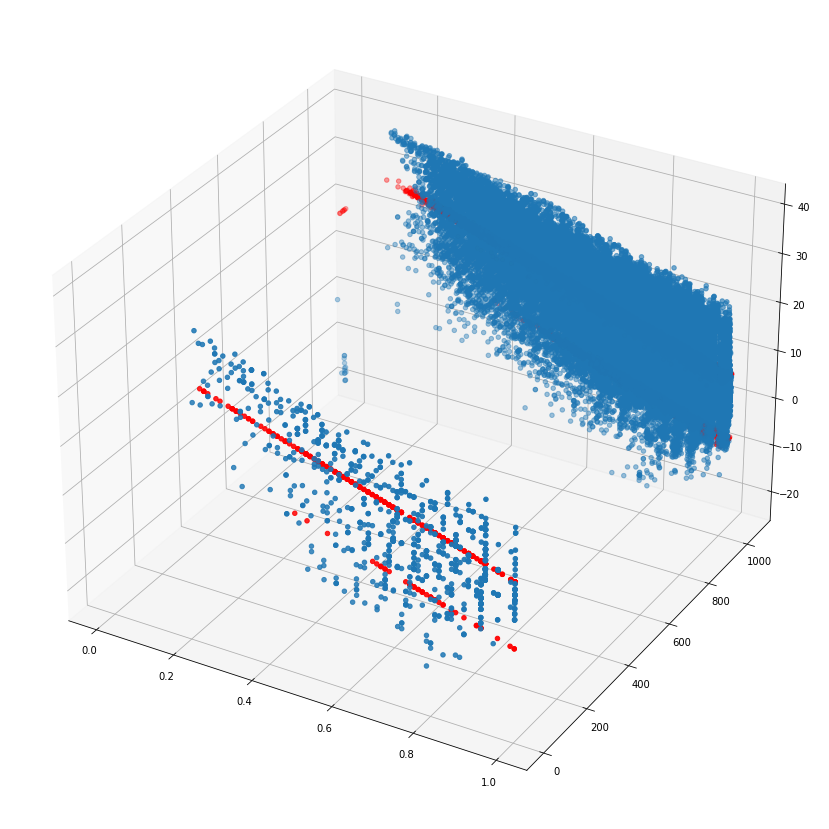

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Видно, что предсказания (красные точки) лежат в правильных "облаках".

# Градиентный спуск

Из-за фичи Pressure градиентный спуск расходился, регуляризация не помогла. Поэтому был дописан метод наискорейшнего спуска - когда мы выбираем оптимальный шаг alpha.
   

In [11]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, tolerance=1, descent_method='normalization const', 
                                   reg_lmb=100, regularization='L2', loss=MSE)
gd.fit(X_train, y_train)

In [12]:
y_ = gd.predict(X_test)

In [13]:
from quality_functional import MSE, MAE
print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 93.12577784472535
MAE = 7.991609427920108


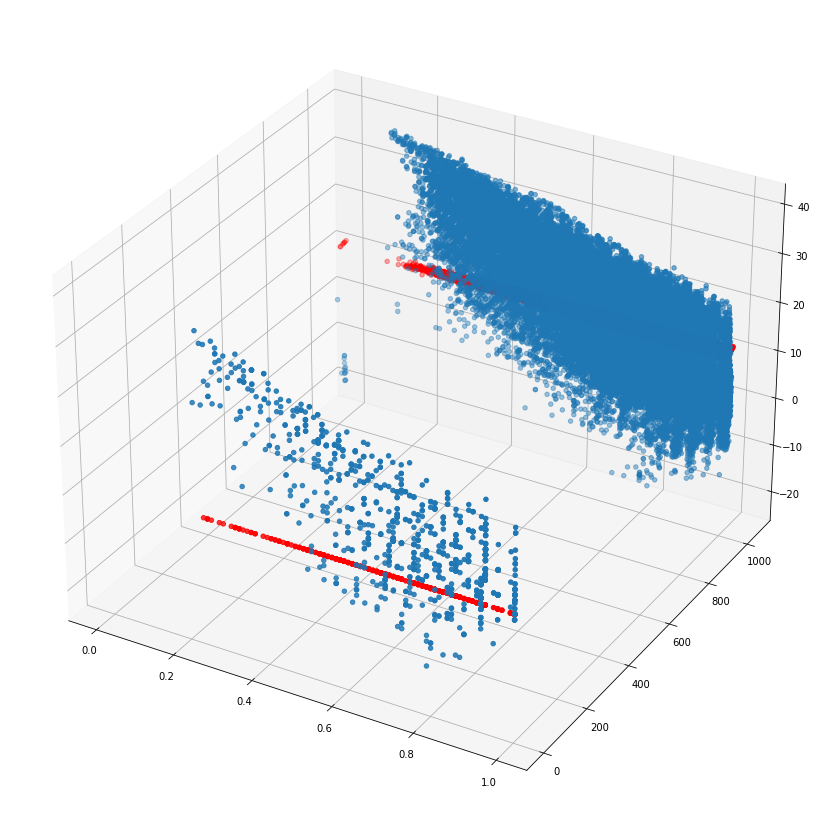

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure (millibars)'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure (millibars)'], zs=y_, c='red')
# ax.scatter(xs=X['Humidity'], ys=X['Pressure (millibars)'], zs=y, c='green')

Метод показал себя гораздо хуже аналитического решения, однако если убрать фичу Pressure то градиентный спуск все же сходится к оптимуму 

In [15]:
X = weather_ds.drop(columns=['Temperature (C)', 'Pressure (millibars)'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600)
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

MSE = 38.68888654835226
MAE = 5.156780431666541


Попробуем отнормировать саму фичу

In [16]:
from data import normalize_columns
weather_ds = weather_ds.rename(columns={'Pressure (millibars)': 'Pressure'})
normalize_columns(weather_ds, columns=['Pressure'])

MSE = 38.15945489830259
MAE = 5.127176228652795


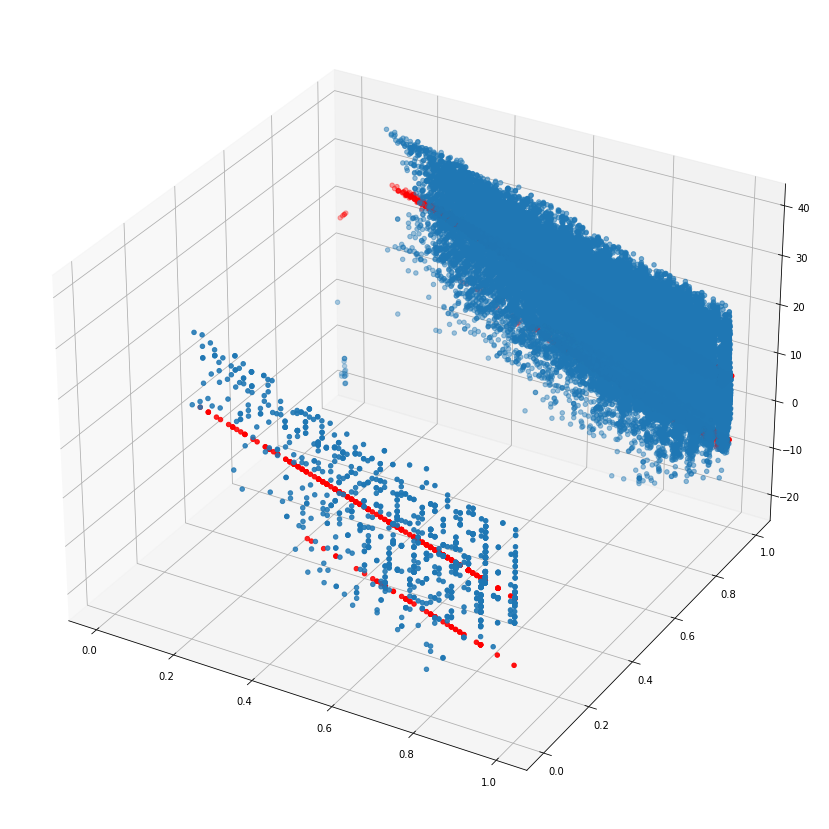

In [17]:
X = weather_ds.drop(columns=['Temperature (C)'])
y = weather_ds['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gd = linear.StandardGradientDescent(alpha=0.1, S =600, 
                                   loss = MSE, descent_method='normalization const')
gd.fit(X_train, y_train)
y_ = gd.predict(X_test)

print(f'MSE = {MSE.get_loss(y_test, y_)}\nMAE = {MAE.get_loss(y_test, y_)}')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_, c='red')

Нормировка фичи помогла!!! УРААА

# Stohastic Gradient Descend

MSE = 38.52100117701125
MAE = 5.156026537364223


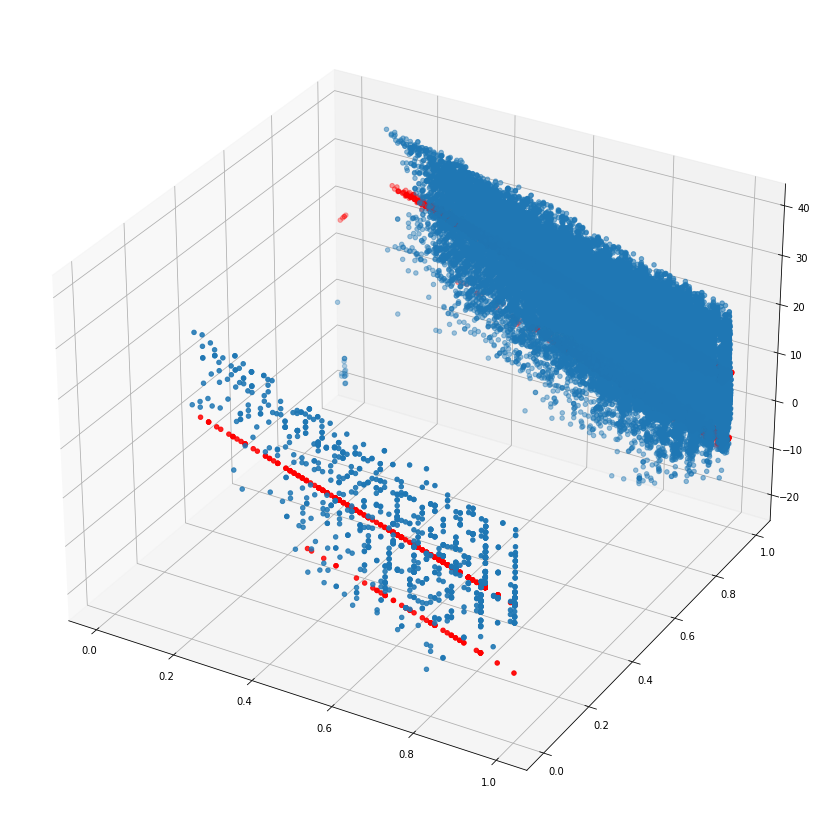

In [18]:
from linear import StochasticGradientDescent
sgd = StochasticGradientDescent(alpha=0.01, eras=5, batch_size=50, tolerance=1, loss=MSE, 
                               descent_method='const')
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(f'MSE = {MSE.get_loss(y_test, y_pred)}\nMAE = {MAE.get_loss(y_test, y_pred)}')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs=X_train['Humidity'], ys=X_train['Pressure'], zs=y_train)
ax.scatter(xs=X_test['Humidity'], ys=X_test['Pressure'], zs=y_pred, c='red')

# Логистическая регрессия

In [43]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df = iris_df.reset_index()
iris_df = iris_df.drop(columns=['Id', 'index'])
iris_df = iris_df.astype({'Species': 'category'})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris_df['Species'].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

In [45]:
iris_df['is_setosa']= (iris_df['Species'] == 'Iris-setosa').astype(int)
iris_df = iris_df.drop(columns='Species')
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,is_setosa
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [46]:
X = iris_df.drop(columns='is_setosa')
y = iris_df['is_setosa']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Оба написанных класса показывают отличный результат классификации:

In [48]:
from linear import StandardGradientDescent
from quality_functional import LogisticLoss
gd = StandardGradientDescent(alpha = 0.1, S = 100, loss=LogisticLoss)
gd.fit(X_train, y_train)

In [49]:
y_proba = gd.predict(X_test)

In [50]:
(y_proba > 0.5) == (y_test == 1)

104    True
41     True
79     True
95     True
36     True
20     True
85     True
64     True
81     True
46     True
103    True
28     True
100    True
43     True
10     True
7      True
58     True
40     True
6      True
35     True
76     True
107    True
106    True
80     True
74     True
15     True
54     True
65     True
121    True
18     True
2      True
87     True
111    True
147    True
123    True
49     True
59     True
19     True
Name: is_setosa, dtype: bool

In [51]:
sgd = StochasticGradientDescent(alpha=0.01, eras=20, tolerance = 1, batch_size=30, loss=LogisticLoss)
sgd.fit(X_train, y_train)
y_proba = sgd.predict(X_test)

In [52]:
(y_proba > 0.5) == (y_test == 1)

104    True
41     True
79     True
95     True
36     True
20     True
85     True
64     True
81     True
46     True
103    True
28     True
100    True
43     True
10     True
7      True
58     True
40     True
6      True
35     True
76     True
107    True
106    True
80     True
74     True
15     True
54     True
65     True
121    True
18     True
2      True
87     True
111    True
147    True
123    True
49     True
59     True
19     True
Name: is_setosa, dtype: bool

## Многоклассовая классификация

In [53]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df = iris_df.reset_index()
iris_df = iris_df.drop(columns=['Id', 'index'])
iris_df = iris_df.astype({'Species': 'category'})
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### OneVsAll:

In [56]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, loss=LogisticLoss)
classifier = linear.OneVsAllClassifier(gd)
classifier.fit(X_train, y_train)

In [57]:
y_pred = classifier.predict(X_test)


In [58]:
y_test == y_pred

62      True
39      True
104     True
129    False
42      True
145    False
35      True
97      True
70      True
58      True
135    False
77      True
124    False
128     True
53      True
90      True
149    False
110    False
32      True
36      True
66      True
134    False
119    False
40      True
8       True
48      True
52      True
69      True
82      True
60      True
98      True
30      True
21      True
49      True
29      True
26      True
86      True
33      True
Name: Species, dtype: bool

### AllVsAll

In [59]:
gd = linear.StandardGradientDescent(alpha=0.01, S=500, loss=LogisticLoss)
classifier = linear.AllVsAllClassifier(gd)
classifier.fit(X_train, y_train)

/home/kurilab/projects/kurilib-ml/data.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.loc[positive_indexes].append(X.loc[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y[positive_indexes].append(y[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X = X.loc[positive_indexes].append(X.loc[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:28: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y = y[positive_indexes].append(y[negative_indexes])
/home/kurilab/projects/kurilib-ml/data.py:27: Futu

In [60]:
y_pred = classifier.predict(X_test)


In [61]:
y_test.reset_index()['Species'] == y_pred

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
dtype: bool